# Introduction

In [17]:
import numpy as np #linear algebra
import pandas as pd #data processing 

from matplotlib import pyplot as plt
import seaborn as sns

In [18]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [19]:
def lapply(list_input,function):
  "Apply a function to every item on a list"
  list_output = []
  for item in list(list_input):
    list_output.append(function(item))
  if type(list_output[0]) != type(None): return list_output

In [20]:
!ls "/content/drive/My Drive/Python_Projects/ERP_data"

demographic.csv  ERPdata.csv


# Read in Data

In [21]:
experimental_data = pd.read_csv('/content/drive/My Drive/Python_Projects/ERP_data/ERPdata.csv')
experimental_data.head()

,subject,condition,Fz,FCz,Cz,FC3,FC4,C3,C4,CP3,CP4,time_ms
0,1,1,5.533701,5.726507,5.469535,5.386723,4.588875,6.560092,4.542811,5.397492,5.103695,-1500.0000
1,1,1,5.651489,5.837326,5.773131,5.627975,4.822217,6.739976,4.811770,5.541357,5.379273,-1499.0234
2,1,1,5.717580,5.932924,5.948466,5.826460,4.979647,7.026199,5.053779,5.634972,5.600504,-1498.0469
3,1,1,5.703267,5.968103,5.851512,5.812192,4.992899,6.940671,5.106650,5.543577,5.589775,-1497.0703
4,1,1,5.571578,5.917541,5.812808,5.744715,4.963338,6.726491,5.158073,5.454069,5.614092,-1496.0938


In [22]:
experimental_data.describe()

,subject,condition,Fz,FCz,Cz,FC3,FC4,C3,C4,CP3,CP4,time_ms
count,746496.00000,746496.000000,746496.000000,746496.000000,746496.000000,746496.000000,746496.000000,746496.000000,746496.000000,746496.000000,746496.000000,746496.000000
mean,41.00000,2.000000,0.474356,0.770428,0.975094,0.708243,0.506167,0.906176,0.585098,0.753679,0.589929,-0.488281
std,23.38092,0.816497,2.615844,2.460129,2.486899,2.204775,2.105947,2.288293,2.064552,2.194443,2.190417,866.025943
min,1.00000,1.000000,-24.450370,-13.313033,-12.661285,-12.461982,-12.161722,-13.735528,-15.376662,-10.234719,-15.120635,-1500.000000
25%,21.00000,1.000000,-0.804794,-0.690926,-0.553950,-0.559768,-0.640173,-0.414116,-0.594791,-0.505312,-0.604645,-750.244150
50%,41.00000,2.000000,0.316864,0.525377,0.634382,0.475436,0.351833,0.648493,0.433138,0.607750,0.458142,-0.488300
75%,61.00000,3.000000,1.625080,1.999033,2.227423,1.812084,1.567683,2.063341,1.673550,1.920492,1.709623,749.267550
max,81.00000,3.000000,28.052302,16.870169,15.110261,20.009208,19.165767,18.806053,20.744991,16.881090,23.267924,1499.023400


In [23]:
demographic = pd.read_csv('/content/drive/My Drive/Python_Projects/ERP_data/demographic.csv')
demographic.columns = demographic.columns.str.replace(' ','')

demographic['group'] = demographic['group'].replace(
    to_replace = 1,
    value = 'Control'
  ).replace(
    to_replace = 0,
    value = 'Schizo'
  )

demographic.head()

,subject,group,gender,age,education
0,1,Schizo,M,44,16.0
1,2,Schizo,M,39,17.0
2,3,Schizo,M,53,18.0
3,4,Schizo,M,52,15.0
4,5,Schizo,M,41,16.0


In [24]:
demographic.describe()

,subject,age,education
count,81.000000,81.000000,81.000000
mean,41.000000,39.370370,14.487654
std,23.526581,13.594525,2.267950
min,1.000000,19.000000,9.000000
25%,21.000000,26.000000,13.000000
50%,41.000000,40.000000,15.000000
75%,61.000000,51.000000,16.000000
max,81.000000,63.000000,19.000000


In [25]:
demographic.head()

,subject,group,gender,age,education
0,1,Schizo,M,44,16.0
1,2,Schizo,M,39,17.0
2,3,Schizo,M,53,18.0
3,4,Schizo,M,52,15.0
4,5,Schizo,M,41,16.0


In [26]:
master_df = pd.merge(
    experimental_data,
    demographic,
    on ='subject',
    how = 'inner'
    )
master_df.head()

,subject,condition,Fz,FCz,Cz,FC3,FC4,C3,C4,CP3,CP4,time_ms,group,gender,age,education
0,1,1,5.533701,5.726507,5.469535,5.386723,4.588875,6.560092,4.542811,5.397492,5.103695,-1500.0000,Schizo,M,44,16.0
1,1,1,5.651489,5.837326,5.773131,5.627975,4.822217,6.739976,4.811770,5.541357,5.379273,-1499.0234,Schizo,M,44,16.0
2,1,1,5.717580,5.932924,5.948466,5.826460,4.979647,7.026199,5.053779,5.634972,5.600504,-1498.0469,Schizo,M,44,16.0
3,1,1,5.703267,5.968103,5.851512,5.812192,4.992899,6.940671,5.106650,5.543577,5.589775,-1497.0703,Schizo,M,44,16.0
4,1,1,5.571578,5.917541,5.812808,5.744715,4.963338,6.726491,5.158073,5.454069,5.614092,-1496.0938,Schizo,M,44,16.0


In [27]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746496 entries, 0 to 746495
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   subject    746496 non-null  int64  
 1   condition  746496 non-null  int64  
 2   Fz         746496 non-null  float64
 3   FCz        746496 non-null  float64
 4   Cz         746496 non-null  float64
 5   FC3        746496 non-null  float64
 6   FC4        746496 non-null  float64
 7   C3         746496 non-null  float64
 8   C4         746496 non-null  float64
 9   CP3        746496 non-null  float64
 10  CP4        746496 non-null  float64
 11  time_ms    746496 non-null  float64
 12  group      746496 non-null  object 
 13  gender     746496 non-null  object 
 14  age        746496 non-null  int64  
 15  education  746496 non-null  float64
dtypes: float64(11), int64(3), object(2)
memory usage: 96.8+ MB


In [28]:
master_df.columns

Index(['subject', 'condition', 'Fz', 'FCz', 'Cz', 'FC3', 'FC4', 'C3', 'C4',
       'CP3', 'CP4', 'time_ms', 'group', 'gender', 'age', 'education'],
      dtype='object')

# Analysis

In [29]:
def automelt(subject,condition):
  df = master_df[
    (master_df['subject'] == subject) & 
    (master_df['condition'] == condition)
  ].melt(
    id_vars = ['subject','condition','time_ms','group','gender','age','education'],
    value_vars = ['Fz','FCz','Cz','FC3','FC4','C3','C4','CP3','CP4'],
    var_name = 'Electrode',
    value_name = 'Voltage'
  )
  return df

automelt(1,1)

,subject,condition,time_ms,group,gender,age,education,Electrode,Voltage
0,1,1,-1500.0000,Schizo,M,44,16.0,Fz,5.533701
1,1,1,-1499.0234,Schizo,M,44,16.0,Fz,5.651489
2,1,1,-1498.0469,Schizo,M,44,16.0,Fz,5.717580
3,1,1,-1497.0703,Schizo,M,44,16.0,Fz,5.703267
4,1,1,-1496.0938,Schizo,M,44,16.0,Fz,5.571578
...,...,...,...,...,...,...,...,...,...
27643,1,1,1495.1172,Schizo,M,44,16.0,CP4,2.365034
27644,1,1,1496.0938,Schizo,M,44,16.0,CP4,2.601003
27645,1,1,1497.0703,Schizo,M,44,16.0,CP4,2.699890
27646,1,1,1498.0469,Schizo,M,44,16.0,CP4,2.809396


In [30]:
sub11 = automelt(1,1)
sub11

,subject,condition,time_ms,group,gender,age,education,Electrode,Voltage
0,1,1,-1500.0000,Schizo,M,44,16.0,Fz,5.533701
1,1,1,-1499.0234,Schizo,M,44,16.0,Fz,5.651489
2,1,1,-1498.0469,Schizo,M,44,16.0,Fz,5.717580
3,1,1,-1497.0703,Schizo,M,44,16.0,Fz,5.703267
4,1,1,-1496.0938,Schizo,M,44,16.0,Fz,5.571578
...,...,...,...,...,...,...,...,...,...
27643,1,1,1495.1172,Schizo,M,44,16.0,CP4,2.365034
27644,1,1,1496.0938,Schizo,M,44,16.0,CP4,2.601003
27645,1,1,1497.0703,Schizo,M,44,16.0,CP4,2.699890
27646,1,1,1498.0469,Schizo,M,44,16.0,CP4,2.809396


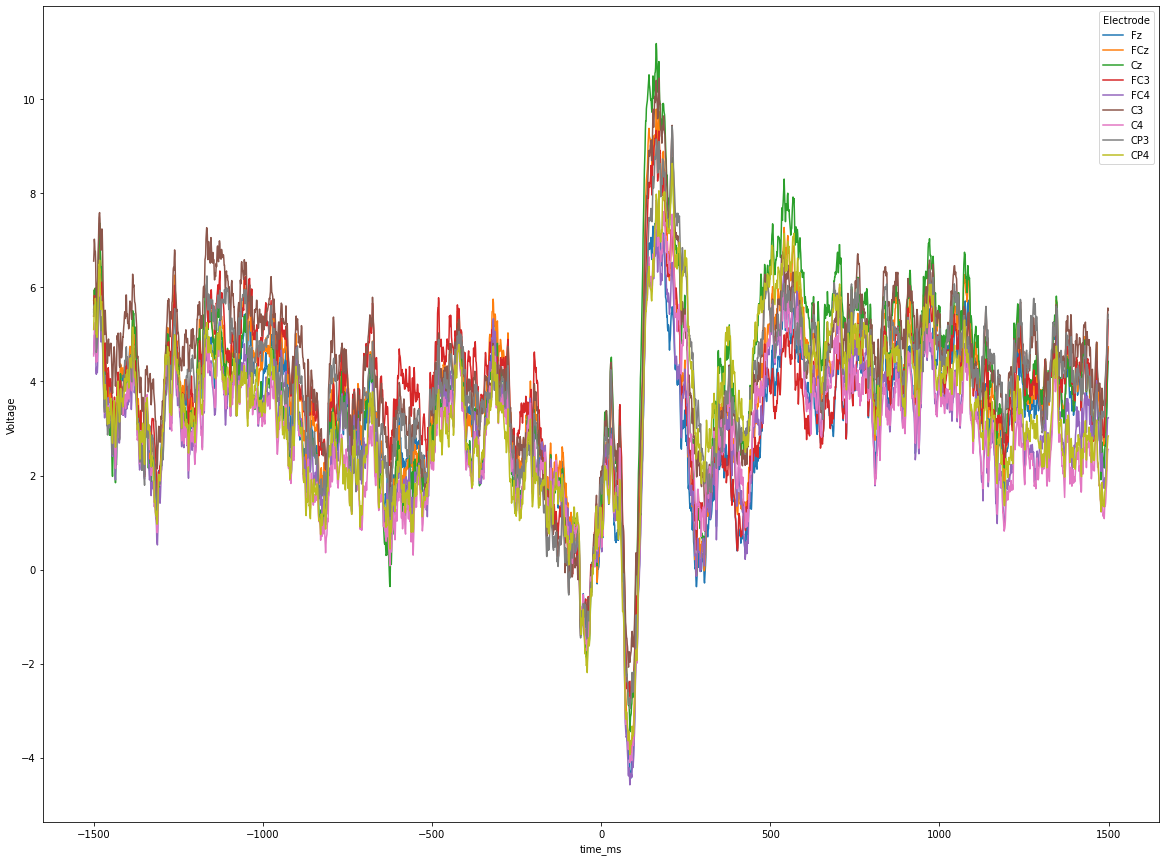

In [31]:
plt.figure(figsize = (20,15))

sns.lineplot(
    data = sub11,
    x = 'time_ms',
    y = 'Voltage',
    hue = 'Electrode'
)

plt.show()

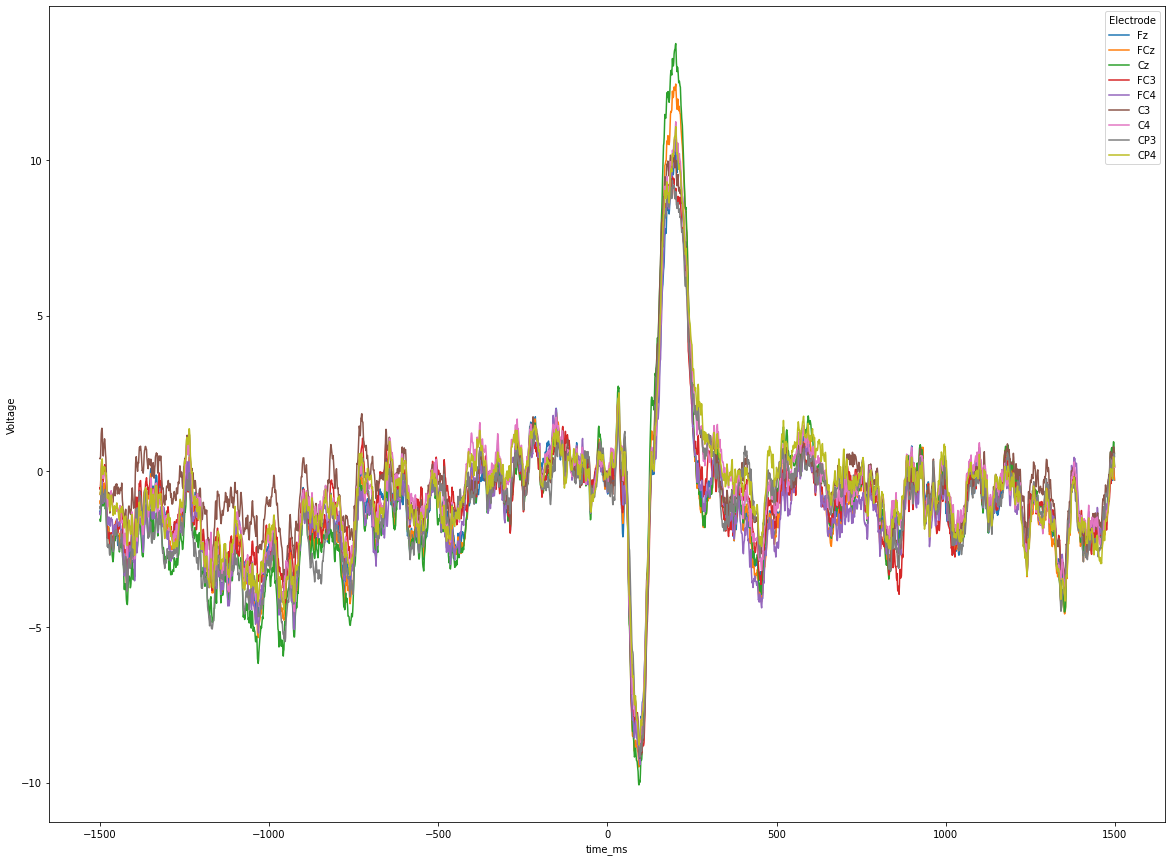

In [32]:
plt.figure(figsize = (20,15))

sns.lineplot(
    data = automelt(1,2),
    x = 'time_ms',
    y = 'Voltage',
    hue = 'Electrode'
)

plt.show()

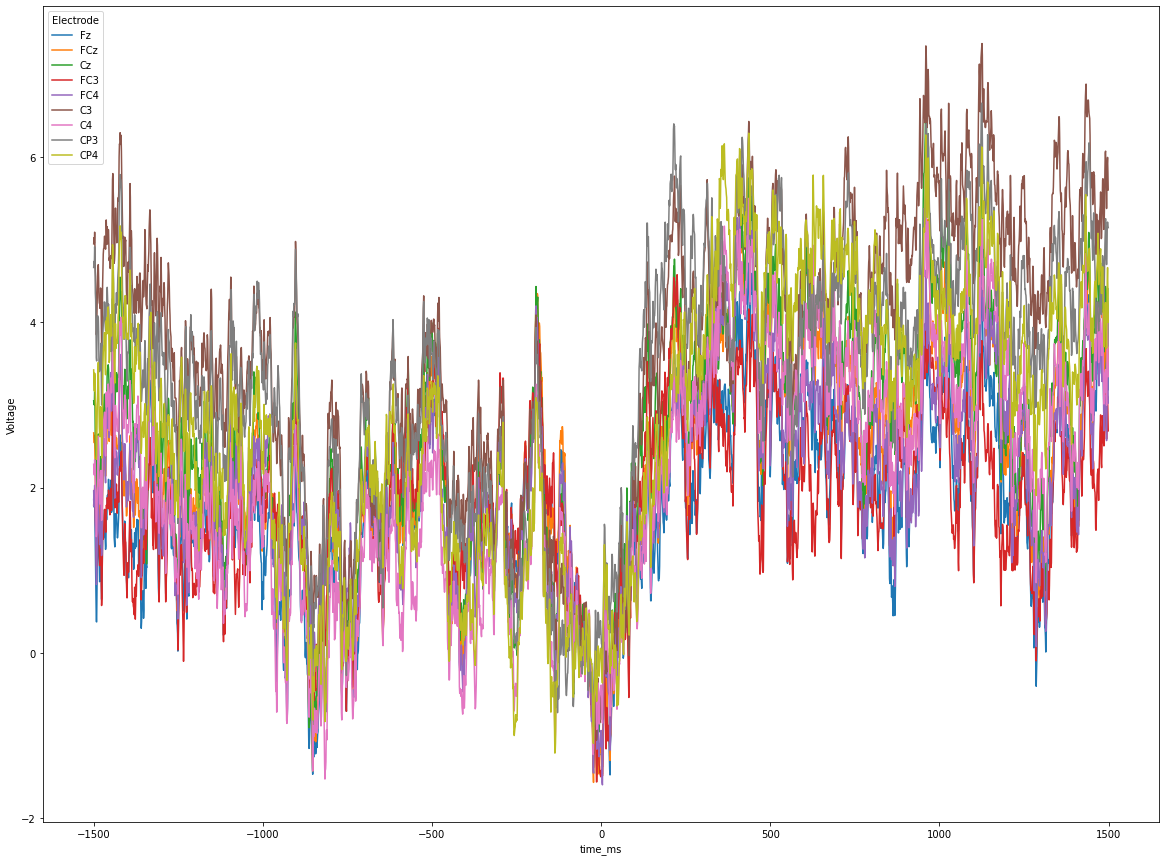

In [33]:
plt.figure(figsize = (20,15))

sns.lineplot(
    data = automelt(1,3),
    x = 'time_ms',
    y = 'Voltage',
    hue = 'Electrode'
)

plt.show()

# Participant Analysis

In [34]:
def get_peak_data(subject,condition):
  df = automelt(subject,condition)
  peak = df['Voltage'].idxmax()
  new_df = df.iloc[[peak]].reset_index(drop = True)
  peak_time = new_df['time_ms'][0]
  peak_voltage = new_df['Voltage'][0]
  return (peak_time,peak_voltage)

get_peak_data(1,1)

(163.0859, 11.186179)

In [35]:
def get_trough_data(subject,condition):
  df = automelt(subject,condition)
  peak = df['Voltage'].idxmin()
  new_df = df.iloc[[peak]].reset_index(drop = True)
  peak_time = new_df['time_ms'][0]
  peak_voltage = new_df['Voltage'][0]
  return (peak_time,peak_voltage)

get_trough_data(1,1)

(84.9609, -4.577337)

In [36]:
pd.DataFrame(
      columns = [
        'subject',
        'condition',
        'peak_time',
        'peak_voltage',
        'trough_time',
        'trough_voltage'
    ]
  )

,subject,condition,peak_time,peak_voltage,trough_time,trough_voltage


In [37]:
def make_df(subject,condition = 1):
  colnames = [
    'subject',
    'condition',
    'peak_time',
    'peak_voltage',
    'trough_time',
    'trough_voltage'
  ]
  
  peak_time,peak_voltage = get_peak_data(subject,condition)
  trough_time,trough_voltage = get_trough_data(subject,condition)

  df = pd.DataFrame(
      [[subject,condition,peak_time,peak_voltage,trough_time,trough_voltage]],
      columns = colnames
  )
  return df 

In [38]:
make_df(1,1)

,subject,condition,peak_time,peak_voltage,trough_time,trough_voltage
0,1,1,163.0859,11.186179,84.9609,-4.577337


In [39]:
def iterate_condition(subject):
  conditions = [1,2,3]
  df = pd.DataFrame(columns = [
    'subject',
    'condition',
    'peak_time',
    'peak_voltage',
    'trough_time',
    'trough_voltage'
  ])
  for condition in conditions:
    df = df.append(make_df(subject = subject,condition = condition))
  return df.reset_index(drop = True)

In [40]:
iterate_condition(subject = 1)

,subject,condition,peak_time,peak_voltage,trough_time,trough_voltage
0,1,1,163.0859,11.186179,84.9609,-4.577337
1,1,2,202.1484,13.738176,93.7500,-10.069123
2,1,3,1125.9766,7.373979,3.9063,-1.595178


In [41]:
master_df['subject'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81])

In [42]:
tidy_df = pd.concat(lapply(
    list_input = master_df['subject'].unique(),
    function = iterate_condition
))
tidy_df = pd.merge(
    left = tidy_df,
    right = demographic,
    how = 'left'
)
tidy_df

,subject,condition,peak_time,peak_voltage,trough_time,trough_voltage,group,gender,age,education
0,1,1,163.0859,11.186179,84.9609,-4.577337,Schizo,M,44,16.0
1,1,2,202.1484,13.738176,93.7500,-10.069123,Schizo,M,44,16.0
2,1,3,1125.9766,7.373979,3.9063,-1.595178,Schizo,M,44,16.0
3,2,1,-1308.5938,5.706183,80.0781,-3.366341,Schizo,M,39,17.0
4,2,2,189.4531,3.237338,88.8672,-6.120319,Schizo,M,39,17.0
...,...,...,...,...,...,...,...,...,...,...
238,80,2,184.5703,3.856011,94.7266,-4.408733,Control,M,33,13.0
239,80,3,42.9688,3.079352,555.6641,-5.563678,Control,M,33,13.0
240,81,1,172.8516,3.928930,-1088.8672,-3.532497,Control,M,56,13.0
241,81,2,-758.7891,5.146215,257.8125,-3.455720,Control,M,56,13.0


In [46]:
tidy_df[tidy_df["condition"] == 1]

,subject,condition,peak_time,peak_voltage,trough_time,trough_voltage,group,gender,age,education
0,1,1,163.0859,11.186179,84.9609,-4.577337,Schizo,M,44,16.0
3,2,1,-1308.5938,5.706183,80.0781,-3.366341,Schizo,M,39,17.0
6,3,1,166.0156,8.686407,82.0313,-5.133853,Schizo,M,53,18.0
9,4,1,172.8516,9.948384,89.8438,-6.573455,Schizo,M,52,15.0
12,5,1,1066.4063,20.552803,88.8672,-7.423478,Schizo,M,41,16.0
...,...,...,...,...,...,...,...,...,...,...
228,77,1,167.9688,7.846096,74.2188,-2.883566,Control,M,28,13.0
231,78,1,462.8906,7.830757,83.9844,-7.439552,Control,F,32,16.0
234,79,1,-1157.2266,11.422450,54.6875,-5.235304,Control,M,37,16.0
237,80,1,141.6016,4.658766,1459.9609,-4.087234,Control,M,33,13.0


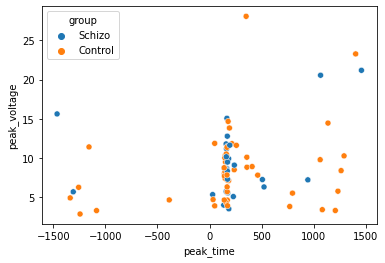

In [47]:
sns.scatterplot(
    data = tidy_df[tidy_df["condition"] == 1],
    x = 'peak_time',
    y = 'peak_voltage',
    hue = 'group'
)

plt.show()

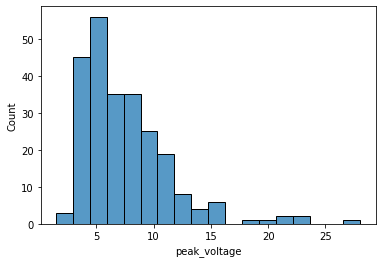

In [51]:
sns.histplot(
    tidy_df["peak_voltage"]
)
plt.show()